In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [3]:
data = pd.read_csv('/Users/pranavkumar/Documents/GitHub/PREDICTIVE-ANALYTICS/Class/50_Startups.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder # I have to do it with the onehotencoder
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])

In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model_multi = LinearRegression()
model_multi.fit(x_train, y_train)
y_pred = model_multi.predict(x_test)

In [6]:
print(r2_score(y_test, y_pred))

0.9337878547341095


In [7]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

9863.426020385214


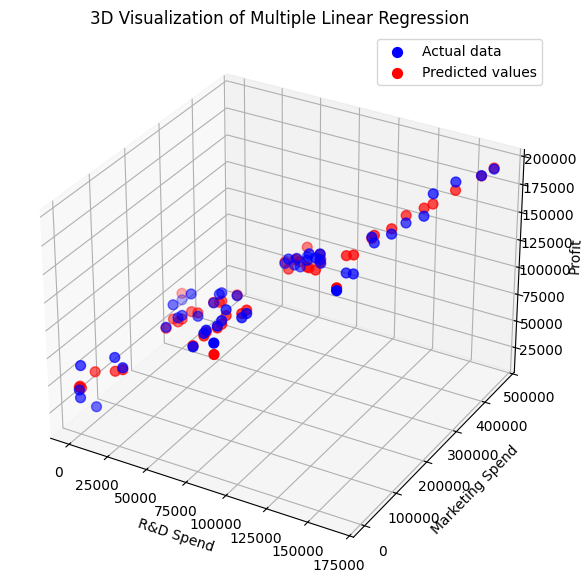

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Example: using R&D Spend and Marketing Spend as x and y, and Profit as z
x1 = data['R&D Spend']
x2 = data['Marketing Spend']
y = data['Profit']
# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='blue', s=50, label='Actual data')
# Predict using trained model
x_plot = data.iloc[:, :-1].values
y_pred = model_multi.predict(x_plot)
ax.scatter(x1, x2, y_pred, color='red', s=50, label='Predicted values')

ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Profit')
ax.set_title('3D Visualization of Multiple Linear Regression')
ax.legend()

plt.show()